# Group 6: Artificial Intelligence Techniques Assignment

1. [SECTION 1: INTRODUCTION](#SECTION-1:-INTRODUCTION)
   
2. [SECTION 2: METHOD](#SECTION-2:-METHOD)
   1. [2.1: Data Description](#2.1:-Data-Description)
   2. [2.2: Data Exploration & Visualization](#2.2:-Data-Exploration-&-Visualization)
   3. [2.3: Data Preprocessing](#2.3:-Data-Preprocessing)
   4. [2.4: Model Training & Validation](#2.4:-Model-Training-&-Validation)
       1. [Model 1: Decision Tree Classifier](#Model-1:-Decision-Tree-Classifier)


# SECTION 1: INTRODUCTION

# SECTION 2: METHOD


In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
ds = pd.read_csv('dataset.csv')

The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 

## 2.1: Data Description

In [3]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
ds.head()

First Few Rows of the Dataset:


,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [4]:
# Display some important information of the data set
print("\nInformation of the data set:")
ds.info()


Information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV        

In [5]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")


Shape of the Dataset:
Rows: 2100, Columns: 18


In [6]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
ds.isnull().any()


Missing Values in Each Column:


Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [7]:
# Display basic statistical information about the numerical columns
print("\nBasic Statistics of Numerical Features:")
ds.describe()


Basic Statistics of Numerical Features:


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [8]:
# Display unique values in categorical columns to understand their distribution
categorical_columns = ds.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {ds[col].unique()}")


Unique Values in Categorical Features:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


## 2.2: Data Exploration & Visualization

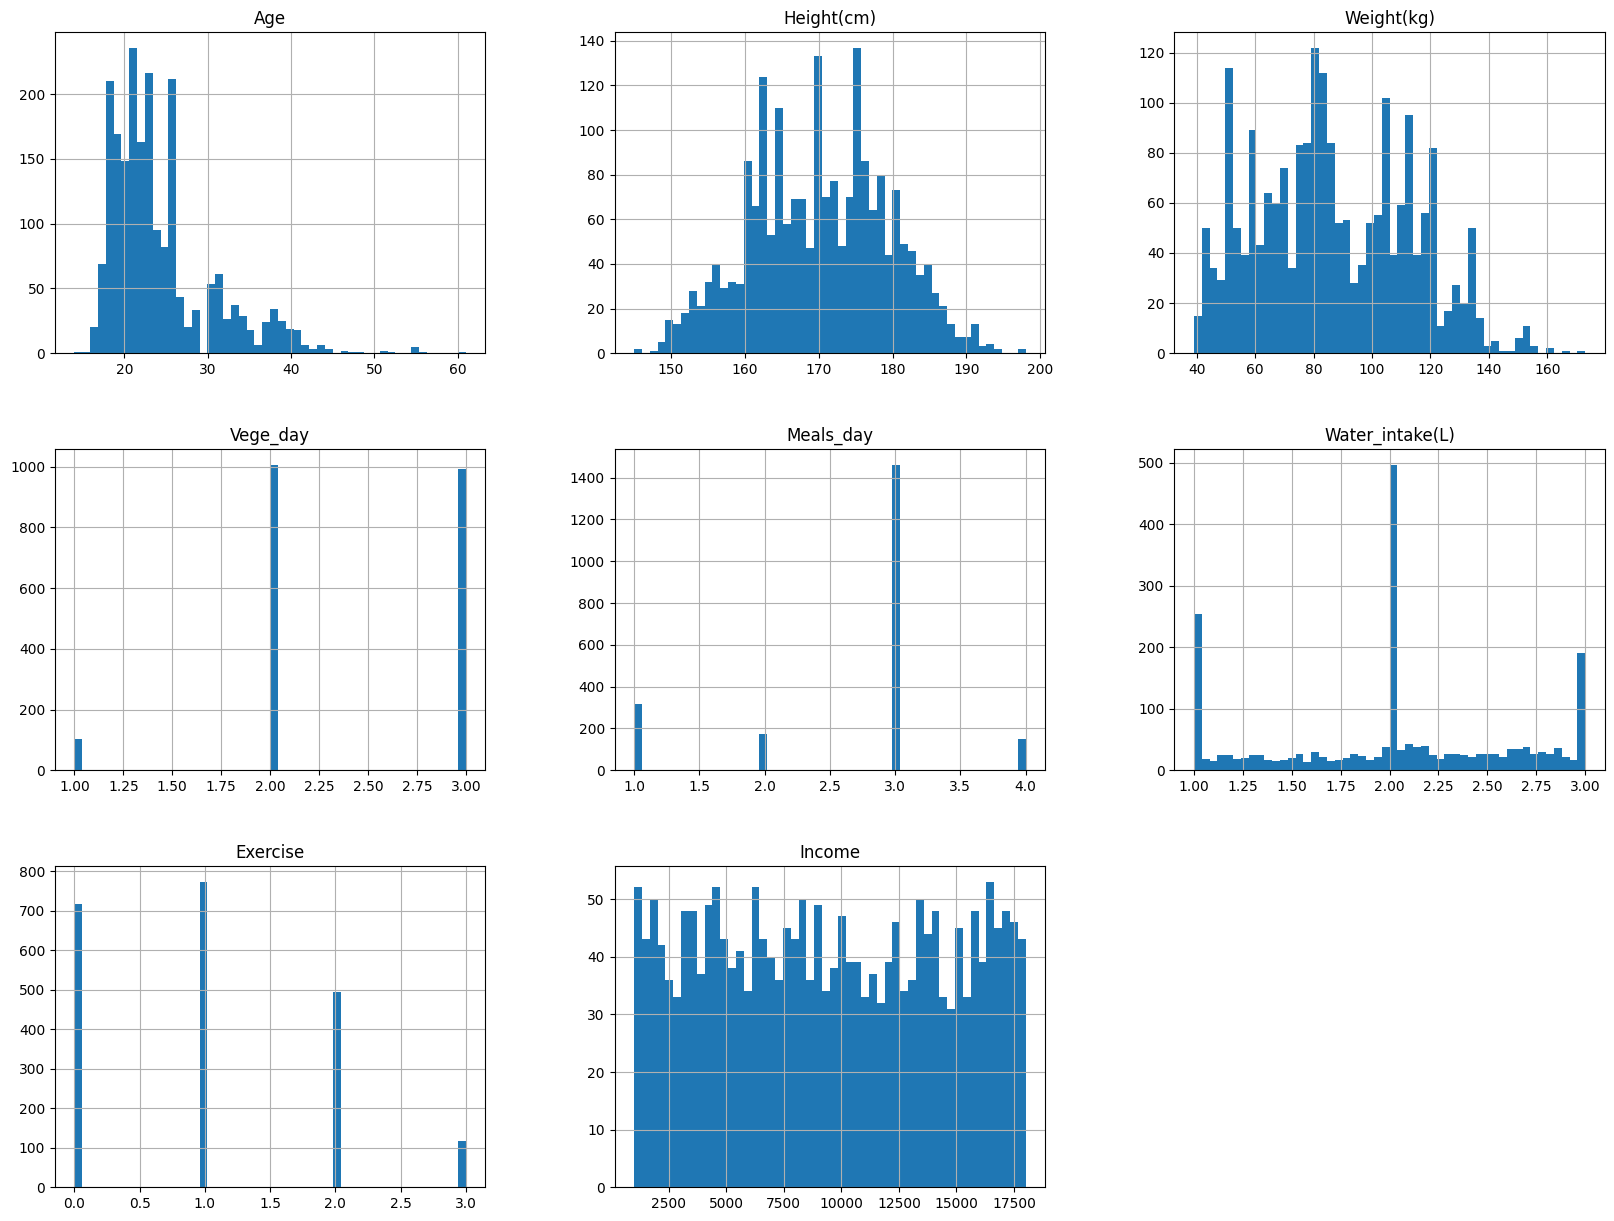

In [9]:
# Plotting histograms for all numerical features
ds.hist(bins=50, figsize=(20, 15))
plt.show()

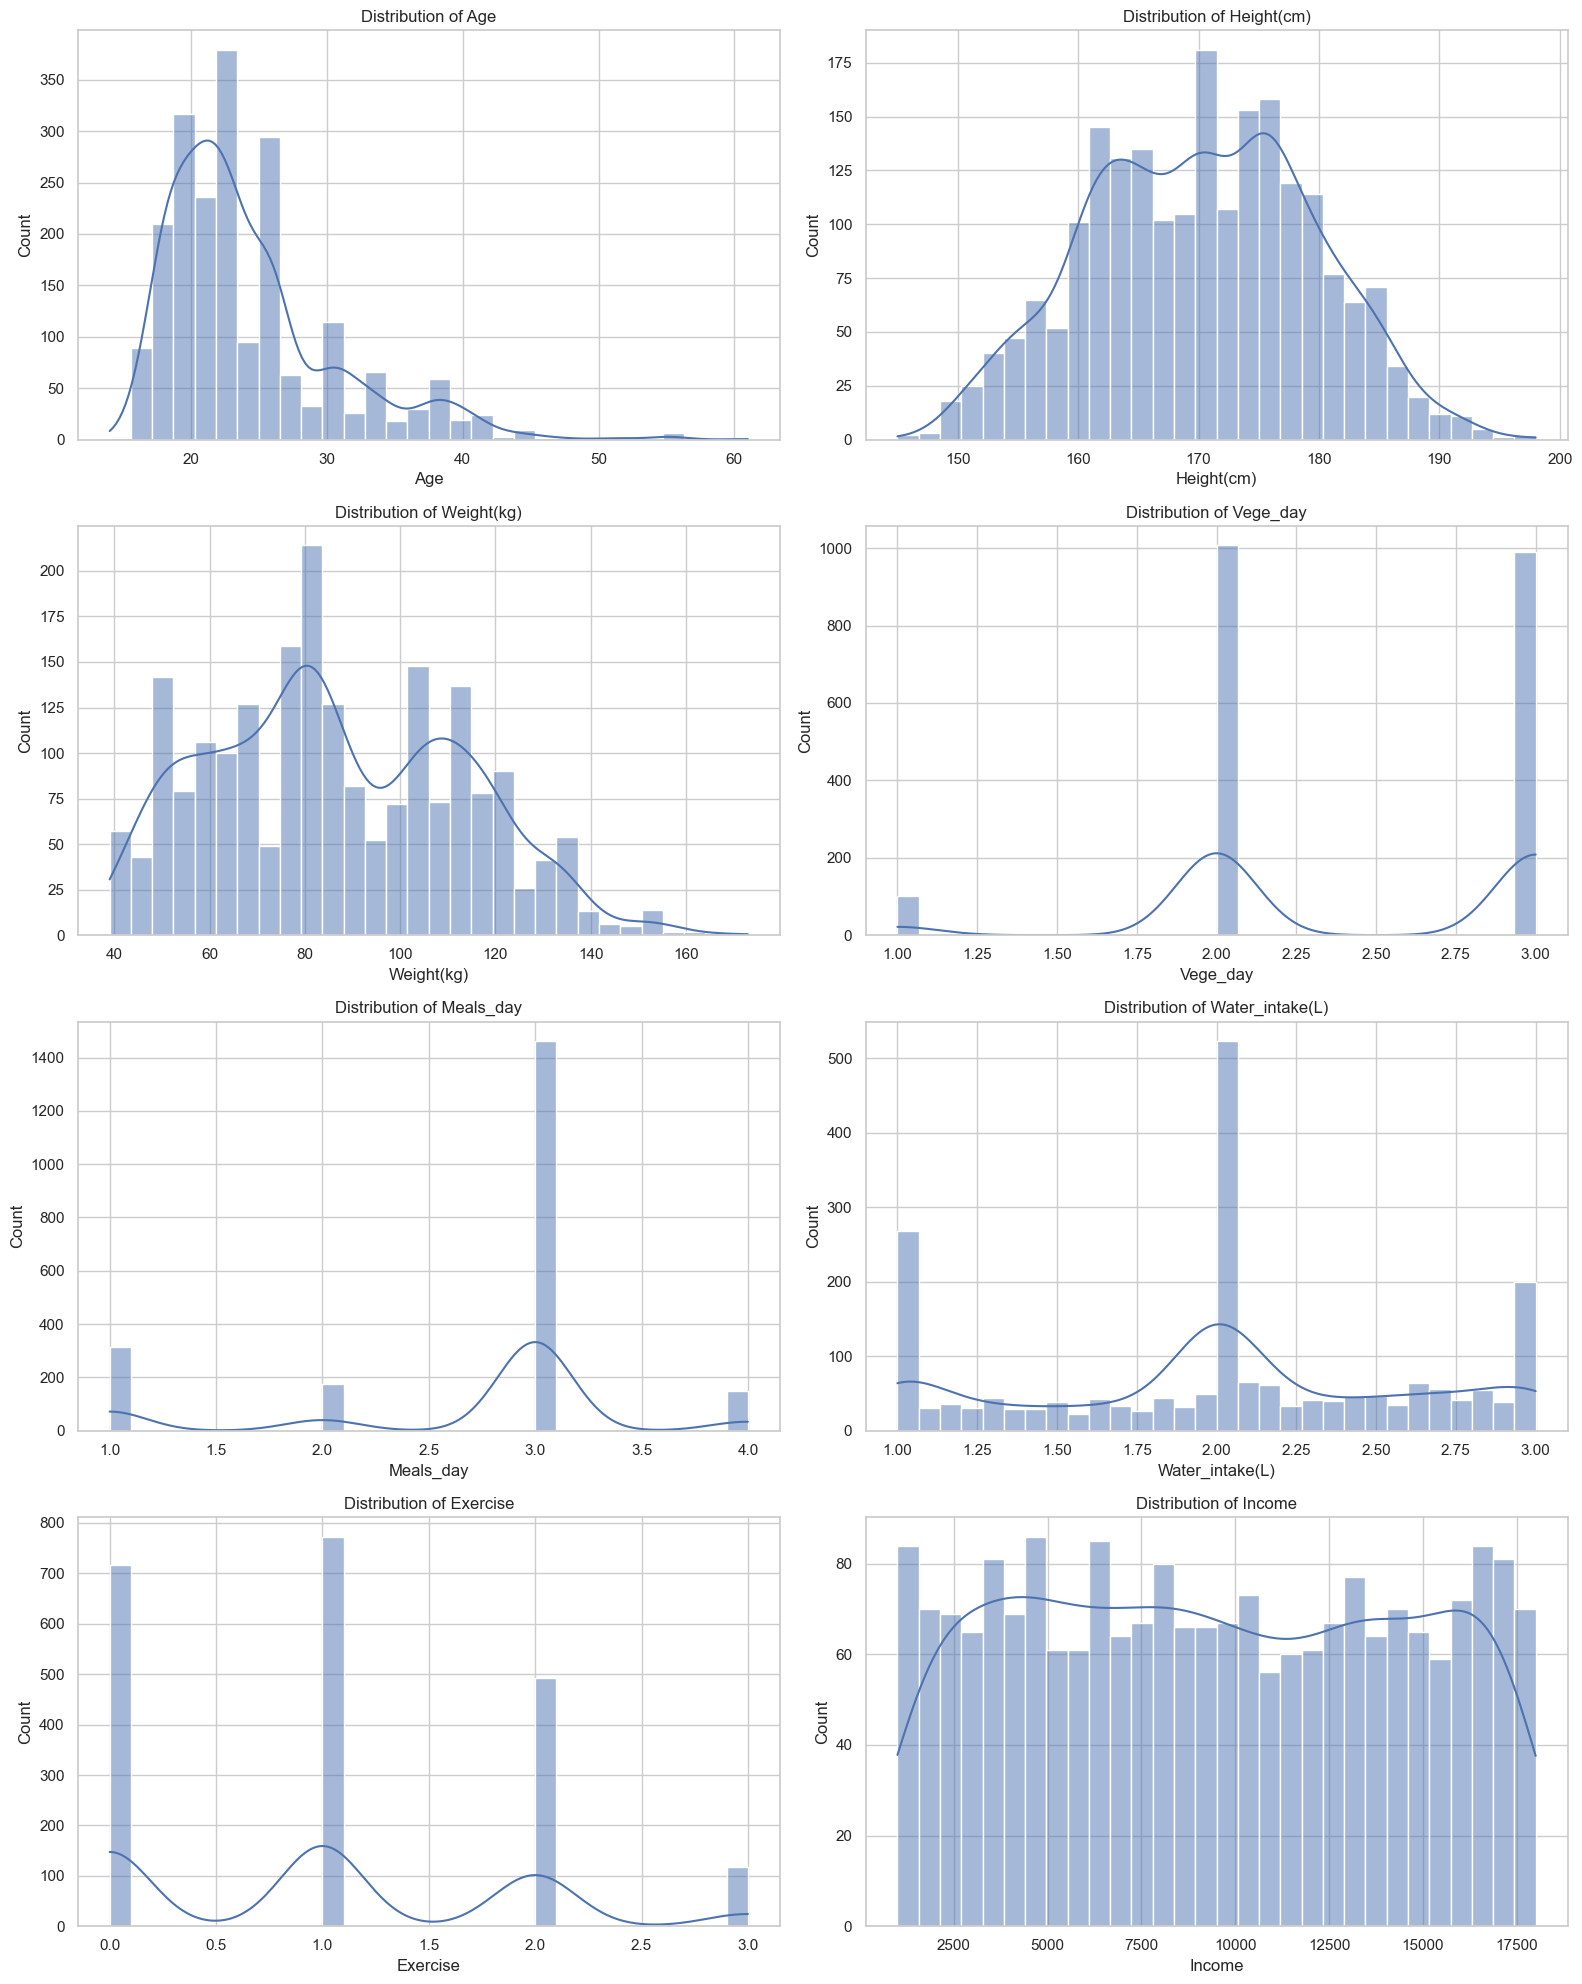

In [10]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a grid of subplots with 4 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Loop through each numerical feature to create individual histograms
for i, feature in enumerate(numerical_features):
    # Plot histogram for each numerical feature with KDE (Kernel Density Estimate) overlaid
    sns.histplot(ds[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    
    # Set the title for each subplot to indicate which feature is being plotted
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

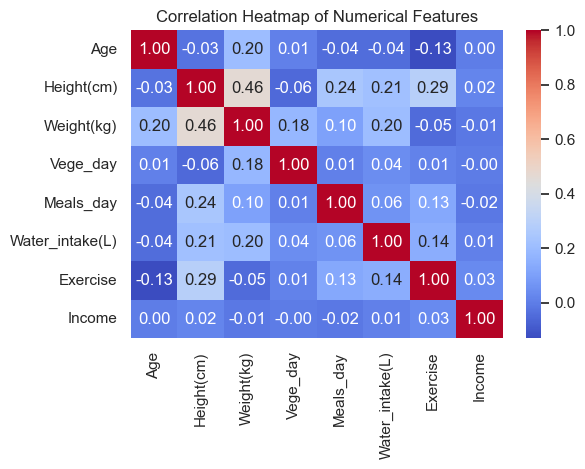

In [11]:
# Calculate the correlation matrix for numerical features only
numerical_ds = ds.select_dtypes(include=[float, int])
corr_matrix = numerical_ds.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


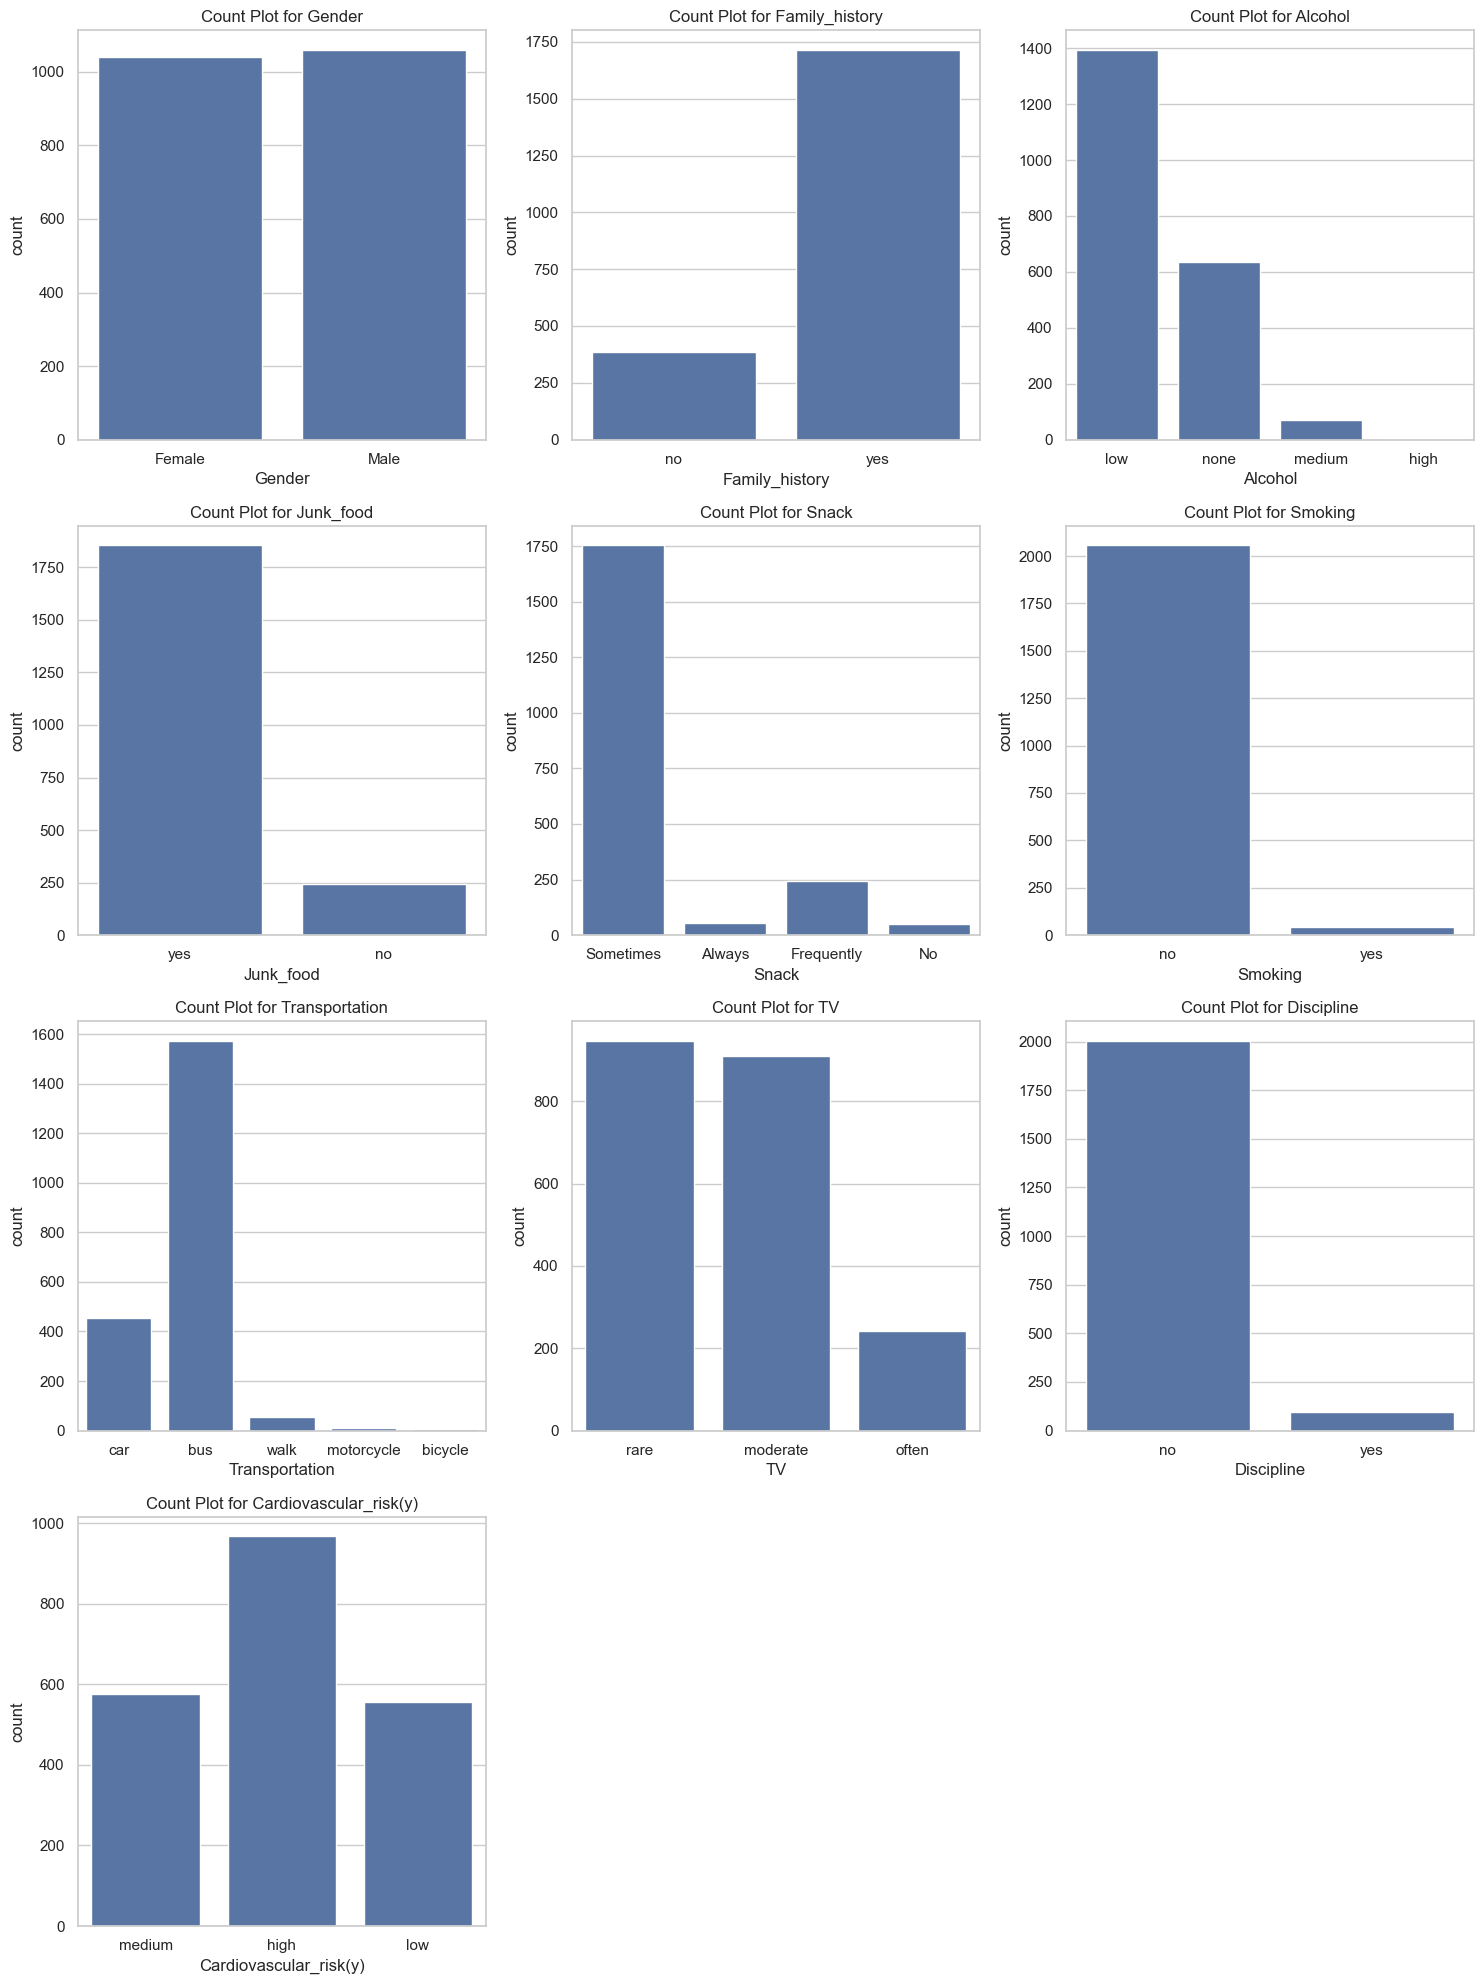

In [12]:
# Automatically identify all categorical features in the dataset
categorical_features = ds.select_dtypes(include=['object']).columns.tolist()

# Set up the number of rows and columns for the grid
n_rows = (len(categorical_features) + 2) // 3  # Calculate number of rows needed (3 columns per row)
n_cols = 3  # You can adjust this based on how many columns you want per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a count plot on a subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=ds, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

# Hide any empty subplots if the grid is larger than the number of features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

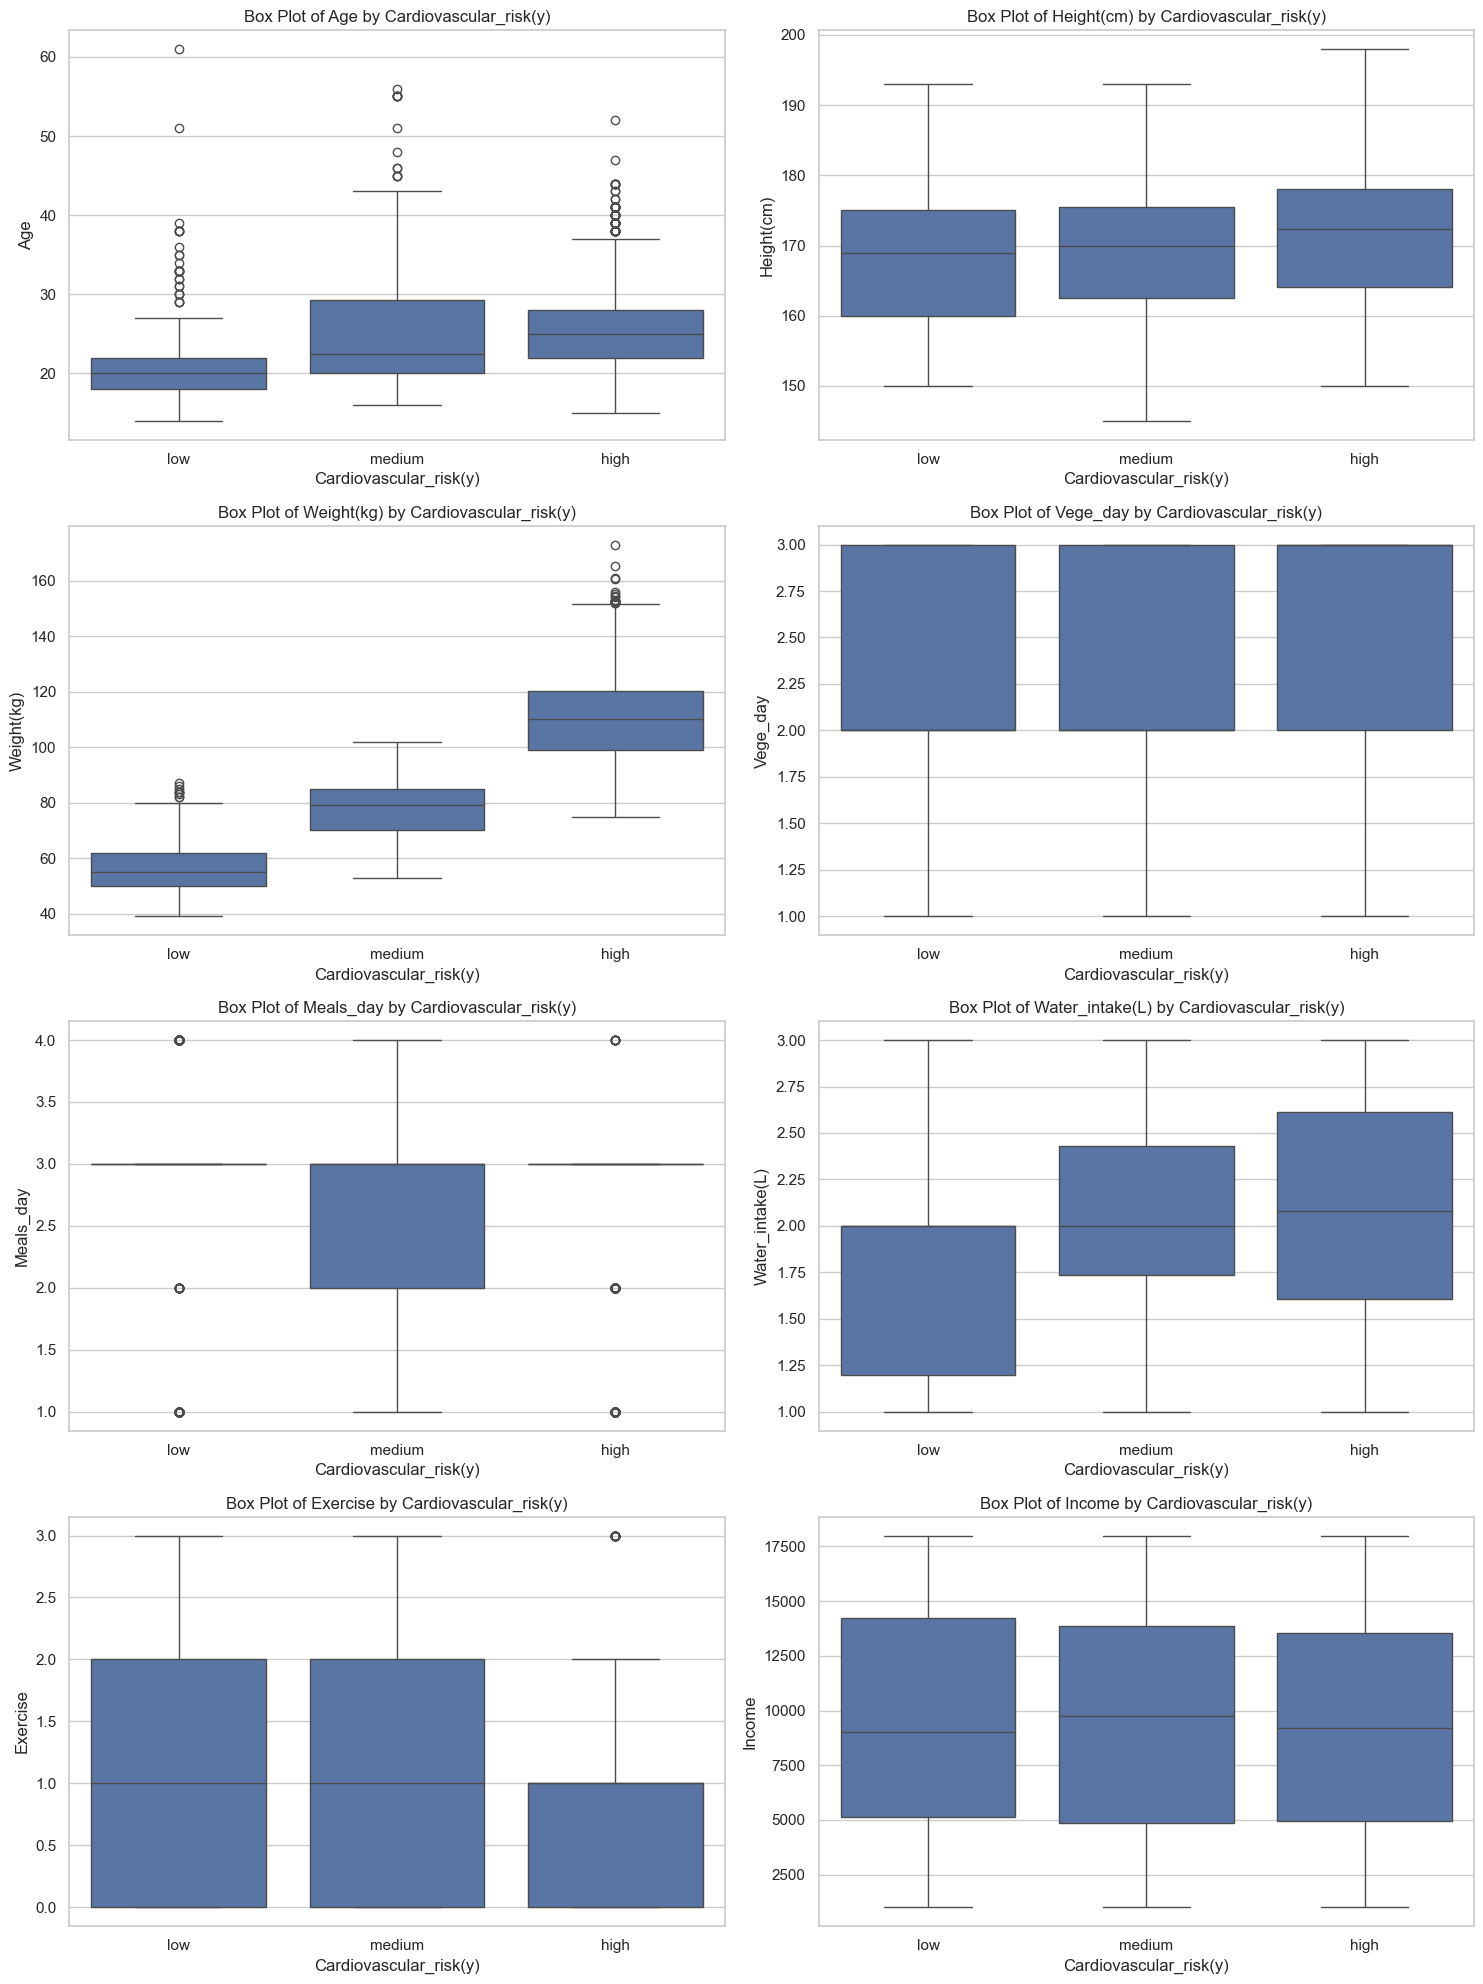

In [13]:
# Load your dataset (assuming it is loaded as 'ds')
# ds = pd.read_csv('dataset.csv')  # Uncomment and modify if the dataset needs to be loaded

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Define the categorical variable for comparison
categorical_variable = 'Cardiovascular_risk(y)'  # Replace with your actual categorical variable

# Specify the desired order of categories
category_order = ['low', 'medium', 'high']

# Set up the number of rows and columns for the grid
n_rows = (len(numerical_features) + 1) // 2  # Calculate number of rows needed (2 columns per row)
n_cols = 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot on a subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=categorical_variable, y=feature, data=ds, ax=axes[i], order=category_order)
    axes[i].set_title(f'Box Plot of {feature} by {categorical_variable}')
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel(feature)

# Hide any empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 2.3: Data Preprocessing 

# Train Set


In [14]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve, roc_curve, roc_auc_score, auc, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
"""
X = ds.drop('Cardiovascular_risk(y)',axis=1)
y = ds['Cardiovascular_risk(y)']
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=69)
# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
# Nominal variables
X_train_cat_nom = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]

# Ordinal variables
X_train_cat_ord = X_train[['Alcohol', 'Snack', 'TV']]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# LabelBinarizer() categorical data

from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
X_train_cat_nom_encoded = []

# One-hot encode each nominal column
for X_train_cat_iter in X_train_cat_nom.columns:
    X_train_cat_val = X_train_cat_nom[X_train_cat_iter]
    X_train_cat_val_nom = lb_encoder.fit_transform(X_train_cat_val)  # one-hot encode
    X_train_cat_nom_encoded.append(X_train_cat_val_nom)

# Stack all the one-hot encoded columns horizontally
X_train_cat_nom_encoded = np.hstack(X_train_cat_nom_encoded)
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
X_train_cat_ord_encoded = []

# Label encode each ordinal column
for X_train_cat_iter in X_train_cat_ord.columns:
    X_train_cat_val = X_train_cat_ord[X_train_cat_iter]
    X_train_cat_val_ord = le_encoder.fit_transform(X_train_cat_val)
    X_train_cat_ord_encoded.append(X_train_cat_val_ord.reshape(-1, 1))  # reshape to keep it as a column

# Stack all the label encoded ordinal columns horizontally
X_train_cat_ord_encoded = np.hstack(X_train_cat_ord_encoded)

# Combine all the transformed categorical data
X_train_cat_encoded = np.hstack([X_train_cat_nom_encoded, X_train_cat_ord_encoded])
# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_encoded])
y_train = y_train.values;  #convert to numpy array
"""


"\nX = ds.drop('Cardiovascular_risk(y)',axis=1)\ny = ds['Cardiovascular_risk(y)']\nX_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=69)\n# split the input matrix into numerical and categorical attributes\nX_train_num  = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)\n# Nominal variables\nX_train_cat_nom = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]\n\n# Ordinal variables\nX_train_cat_ord = X_train[['Alcohol', 'Snack', 'TV']]\n\n# Fill missing values with median\nfrom sklearn.impute import SimpleImputer   \nimputer = SimpleImputer(strategy = 'median')\nimputer.fit(X_train_num)                              # compute the median     \nX_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature\n\n# Standardize numeric data\nfrom sklearn.preprocessing import StandardScaler\nscale

# Test Set (might delete later)

In [16]:
"""
X_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_test_cat_nom = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]
X_test_cat_ord = X_test[['Alcohol', 'Snack', 'TV']]
# Transform the numerical test set
X_test_num_tr = imputer.transform(X_test_num)
# Standardize the numerical test set
X_test_num_tr = scaler.transform(X_test_num_tr)
# One-hot encode the nominal test set
X_test_cat_nom_encoded = []

for i, column in enumerate(X_test_cat_nom.columns):
    lb_encoder = LabelBinarizer()
    lb_encoder.fit(X_train_cat_nom[column])  # fit on training data
    X_test_cat_val = X_test_cat_nom[column]
    X_test_cat_val_nom = lb_encoder.transform(X_test_cat_val)
    X_test_cat_nom_encoded.append(X_test_cat_val_nom)

X_test_cat_nom_encoded = np.hstack(X_test_cat_nom_encoded)

# Label encode the ordinal test set
X_test_cat_ord_encoded = []

for i, column in enumerate(X_test_cat_ord.columns):
    le_encoder = LabelEncoder()
    le_encoder.fit(X_train_cat_ord[column])  # fit on training data
    X_test_cat_val = X_test_cat_ord[column]
    X_test_cat_val_ord = le_encoder.transform(X_test_cat_val)
    X_test_cat_ord_encoded.append(X_test_cat_val_ord.reshape(-1, 1))  # reshape to keep it as a column

X_test_cat_ord_encoded = np.hstack(X_test_cat_ord_encoded)

X_test_cat_encoded = np.hstack([X_test_cat_nom_encoded, X_test_cat_ord_encoded])

X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])

y_test = y_test.values;  #convert to numpy array
"""

"\nX_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)\nX_test_cat_nom = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]\nX_test_cat_ord = X_test[['Alcohol', 'Snack', 'TV']]\n# Transform the numerical test set\nX_test_num_tr = imputer.transform(X_test_num)\n# Standardize the numerical test set\nX_test_num_tr = scaler.transform(X_test_num_tr)\n# One-hot encode the nominal test set\nX_test_cat_nom_encoded = []\n\nfor i, column in enumerate(X_test_cat_nom.columns):\n    lb_encoder = LabelBinarizer()\n    lb_encoder.fit(X_train_cat_nom[column])  # fit on training data\n    X_test_cat_val = X_test_cat_nom[column]\n    X_test_cat_val_nom = lb_encoder.transform(X_test_cat_val)\n    X_test_cat_nom_encoded.append(X_test_cat_val_nom)\n\nX_test_cat_nom_encoded = np.hstack(X_test_cat_nom_encoded)\n\n# Label encode the ordinal test set\nX_test_cat_ord_encoded = [

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
X = ds.drop('Cardiovascular_risk(y)',axis=1)
y = ds['Cardiovascular_risk(y)']
# Define numerical and categorical columns
numerical_cols = ['Age', 'Height(cm)', 'Weight(kg)', 'Water_intake(L)', 'Income']
categorical_cols = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Preprocess numerical data
imputer_num = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]

X_train_num_imputed = imputer_num.fit_transform(X_train_num)
X_test_num_imputed = imputer_num.transform(X_test_num)

X_train_num_tr = scaler.fit_transform(X_train_num_imputed)
X_test_num_tr = scaler.transform(X_test_num_imputed)

# Preprocess categorical data
X_train_cat = X_train[categorical_cols]
X_test_cat = X_test[categorical_cols]

encoder = OneHotEncoder(sparse_output=False)
X_train_cat_tr = encoder.fit_transform(X_train_cat)
X_test_cat_tr = encoder.transform(X_test_cat)

feature_names_afEncode = encoder.get_feature_names_out(categorical_cols)

# Finalize training and test sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_tr])
y_train = y_train.values
y_test = y_test.values

print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 31)
y_train shape: (1680,)
X_test_tr shape: (420, 31)
y_test shape: (420,)


## 2.4: Model Training & Validation

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
#Function to plot pr, roc, and show auc score
def plot_multiclass_pr_roc_curves(y_true, y_pred, class_labels,model):
    """
    Plot Precision-Recall and ROC curves for multi-class classification problems.
    
    Parameters:
    y_true (array-like): True labels
    y_pred (array-like): Predicted probabilities or decision function outputs
    class_labels (list): List of class labels
    
    Returns:
    dict: Dictionary containing AUC scores for each class
    """
    # Binarize the output (One-vs-Rest) for multiclass
    y_true_bin = label_binarize(y_true, classes=class_labels)
    y_pred_bin = label_binarize(y_pred, classes=class_labels)
    n_classes = y_true_bin.shape[1]

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    all_precisions = []
    all_recalls = []
    
    for i in range(n_classes):
        precisions, recalls, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
        all_precisions.append(np.interp(np.linspace(0, 1, 100), recalls[::-1], precisions[::-1]))
        all_recalls.append(np.linspace(0, 1, 100))
    
    macro_precisions = np.mean(all_precisions, axis=0)
    macro_recalls = np.mean(all_recalls, axis=0)
    
    plt.plot(macro_recalls, macro_precisions, lw=2, label='Macro-average PR curve')
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title(f'Macro-average Precision-Recall Curve for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    auc_scores = {}
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores[class_labels[i]] = roc_auc
        plt.plot(fpr, tpr, lw=2, label=f'{class_labels[i]} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'One-vs-Rest ROC Curves for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

    # Print AUC scores
    for label, score in auc_scores.items():
        print(f'AUC {label} = {score:.4f}')
    
    return auc_scores

## SGDClassifier

In [20]:
# Step 1: Create the SGDClassifier
sgd_clf = SGDClassifier(random_state=69)

# Step 2: Train the model
sgd_clf.fit(X_train_tr, y_train)

# Step 3: Predict on the training data
y_train_pred = sgd_clf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(sgd_clf, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9815
Cross-validation scores: [0.95535714 0.97321429 0.94642857]
Mean cross-validation score: 0.9583
Confusion Matrix:
[[771   0   4]
 [  0 439   4]
 [  6  17 439]]


## Cross Validation

In [21]:
y_pred_cv = cross_val_predict(sgd_clf,X_train_tr,y_train,cv=3)

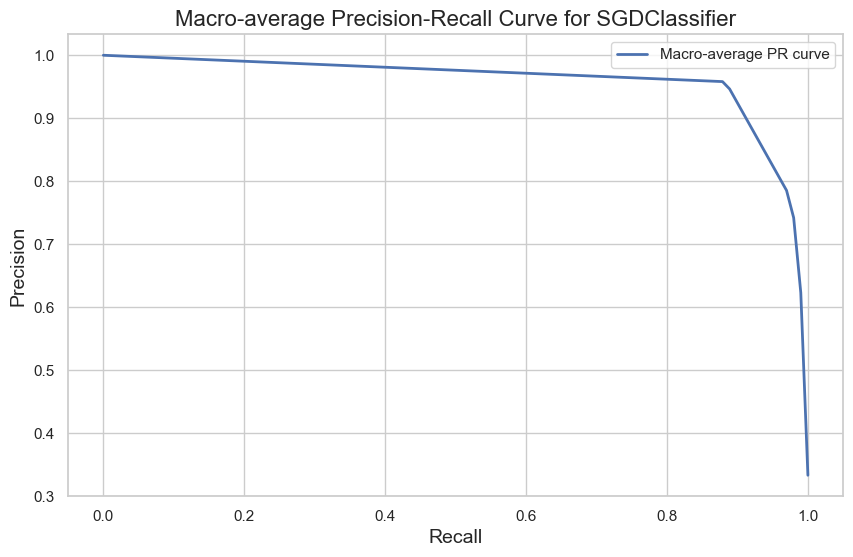

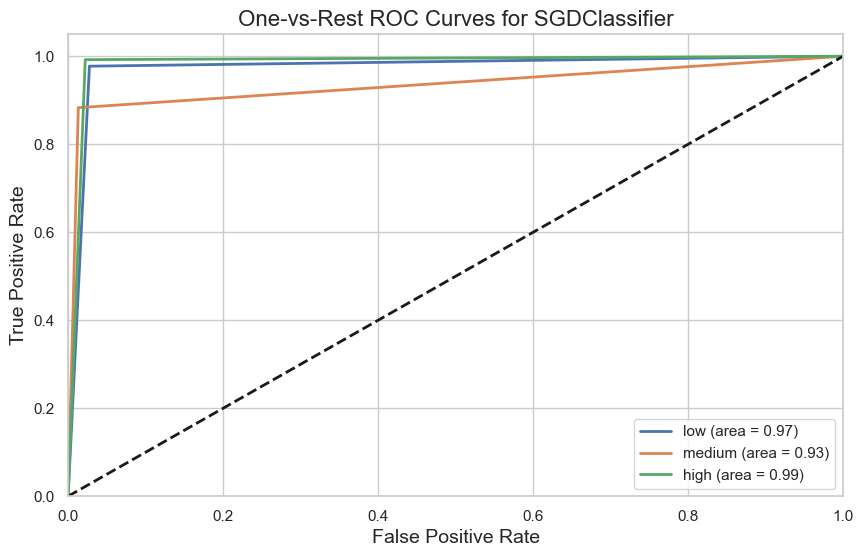

AUC low = 0.9750
AUC medium = 0.9350
AUC high = 0.9851


In [22]:
class_labels = ['low', 'medium', 'high']

auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_cv, class_labels, 'SGDClassifier')

In [23]:
# For multiclass, specify the average method
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_cv, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_cv, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_cv, average='macro')))


Precision (macro) = 0.9547
Recall (macro)    = 0.9509
F1 score (macro)  = 0.9520


## Evaluate model on test set

In [24]:
# Predict on the test set
y_test_pred = sgd_clf.predict(X_test_tr)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")


# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Accuracy on test set: 0.9810

Confusion Matrix (Test Set):
[[192   0   0]
 [  0 112   2]
 [  2   4 108]]


In [25]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=69)

# Train the model on the training data
rf_model.fit(X_train_tr, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train_tr)  # Predict using the training set

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy on training set: 1.0000
Cross-validation scores: [0.95714286 0.95892857 0.93392857]
Mean cross-validation score: 0.9500
Confusion Matrix:
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


In [26]:
y_pred_cv = cross_val_predict(rf_model,X_train_tr,y_train,cv=3)

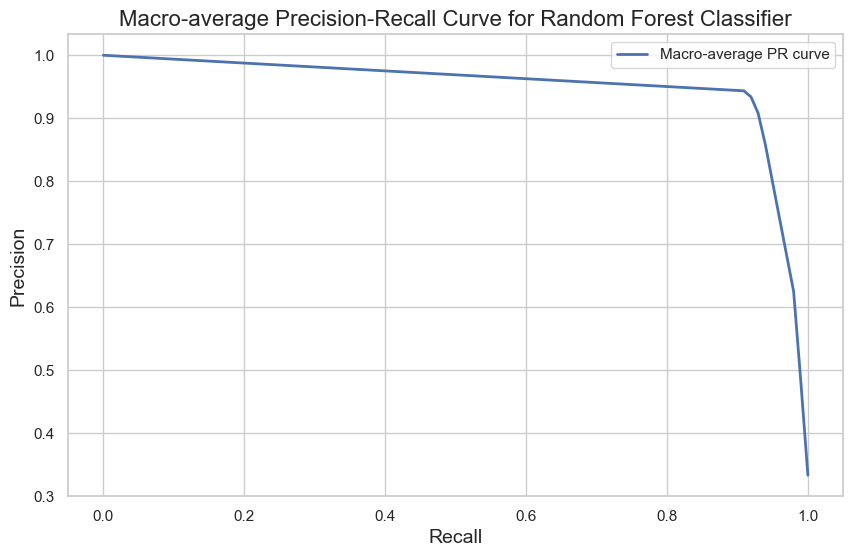

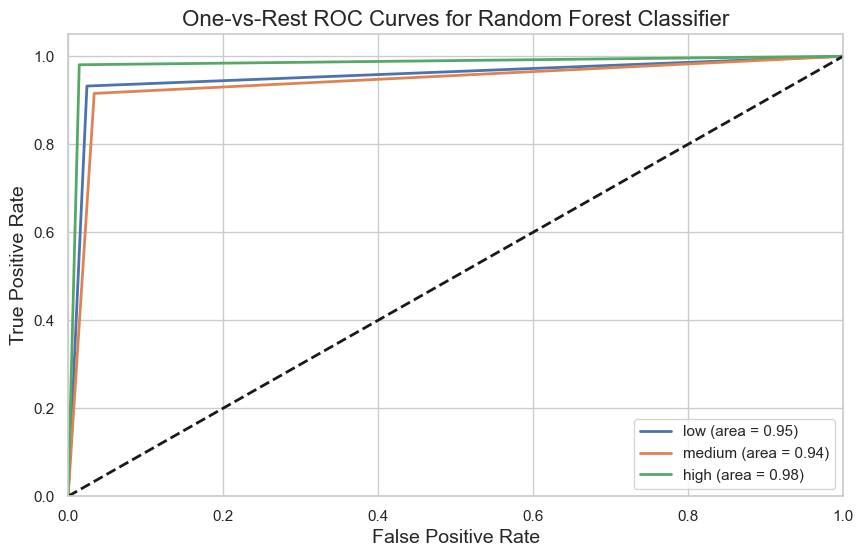

AUC low = 0.9540
AUC medium = 0.9410
AUC high = 0.9831


In [27]:
class_labels = ['low', 'medium', 'high']

auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_cv, class_labels, 'Random Forest Classifier')

In [28]:
# For multiclass, specify the average method
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_cv, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_cv, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_cv, average='macro')))

Precision (macro) = 0.9424
Recall (macro)    = 0.9428
F1 score (macro)  = 0.9426


## Evaluate model on test set

In [29]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test_tr)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")



# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Accuracy on test set: 0.9548

Confusion Matrix (Test Set):
[[189   0   3]
 [  0 105   9]
 [  0   7 107]]


# Logistic Regression

In [30]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=69)

# Train the model on the training data
log_reg.fit(X_train_tr, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_train_tr)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy:.4f}')

cross_val_scores = cross_val_score(log_reg, X_train_tr, y_train, cv=3)
print(f'\nCross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {cross_val_scores.mean():.4f}')
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9839

Cross-validation scores: [0.9625     0.96785714 0.97321429]
Average cross-validation score: 0.9679
Confusion Matrix:
[[770   0   5]
 [  0 428  15]
 [  2   5 455]]


In [31]:
y_pred_cv = cross_val_predict(sgd_clf,X_train_tr,y_train,cv=3)

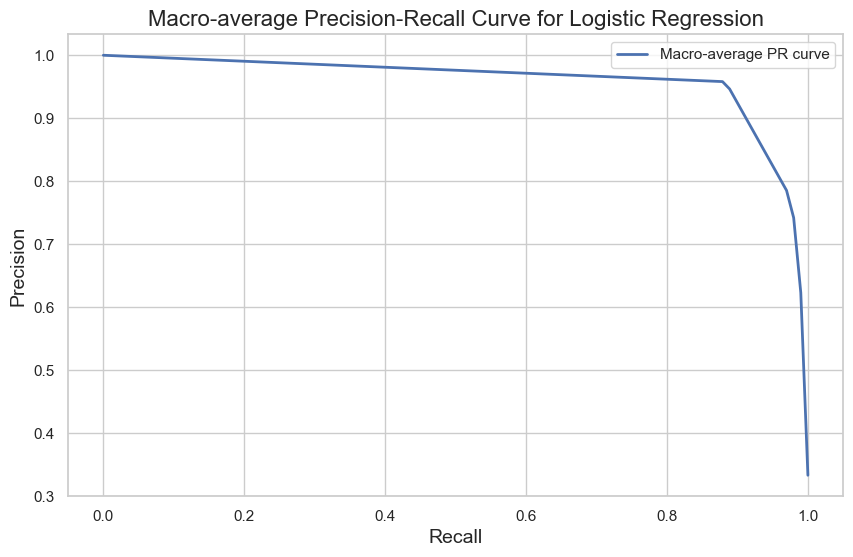

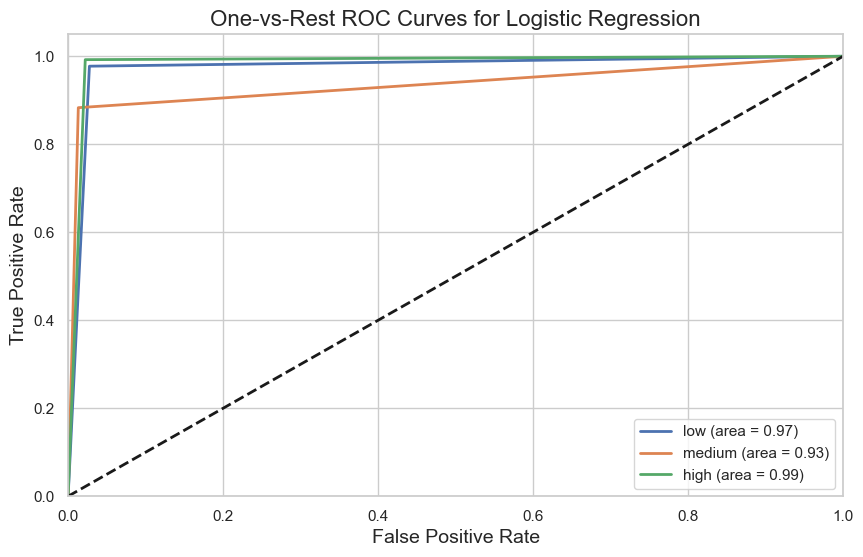

AUC low = 0.9750
AUC medium = 0.9350
AUC high = 0.9851


In [32]:
class_labels = ['low', 'medium', 'high']

auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_cv, class_labels, 'Logistic Regression')

In [33]:
# For multiclass, specify the average method
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_cv, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_cv, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_cv, average='macro')))

Precision (macro) = 0.9547
Recall (macro)    = 0.9509
F1 score (macro)  = 0.9520


## Evaluate with test model

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = log_reg.predict(X_test_tr)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test set: {test_accuracy:.4f}')

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)



Accuracy on test set: 0.9667

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       192
         low       0.99      0.91      0.95       114
      medium       0.90      0.98      0.94       114

    accuracy                           0.97       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.97      0.97      0.97       420


Confusion Matrix (Test Set):
[[190   0   2]
 [  0 104  10]
 [  1   1 112]]


## 2.5: Model Tuning and Testing

### SGDClassfier

In [35]:

# Define the parameter grid
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 3000]
}

# Initialize GridSearchCV for SGDClassifier
grid_search_sgd = GridSearchCV(SGDClassifier(random_state=69), param_grid_sgd, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_sgd.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for SGDClassifier:", grid_search_sgd.best_params_)
print("Best Cross-Validation Score for SGDClassifier:", grid_search_sgd.best_score_)

Best Parameters for SGDClassifier: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}
Best Cross-Validation Score for SGDClassifier: 0.9845238095238095


In [36]:
y_pred_at = grid_search_sgd.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9964
Precision (macro) = 0.9956
Recall (macro)    = 0.9956
F1 score (macro)  = 0.9956
Confusion Matrix:
[[775   0   0]
 [  0 440   3]
 [  0   3 459]]


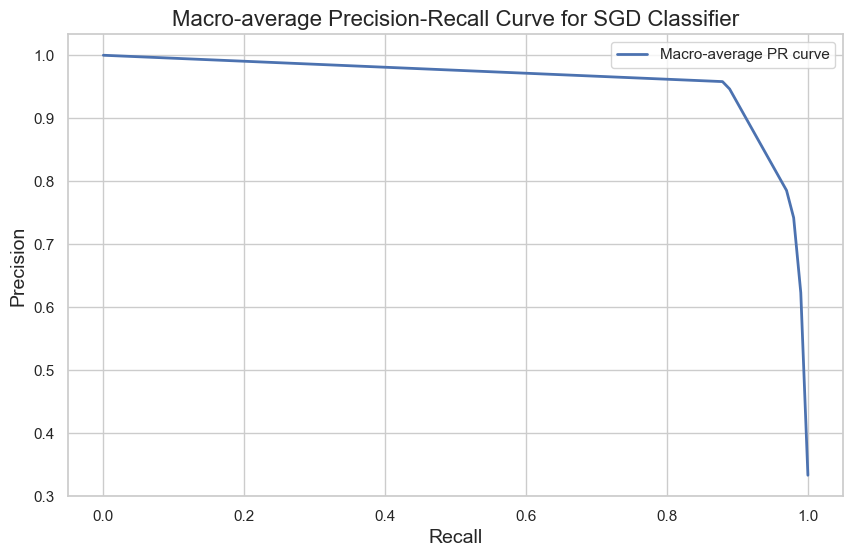

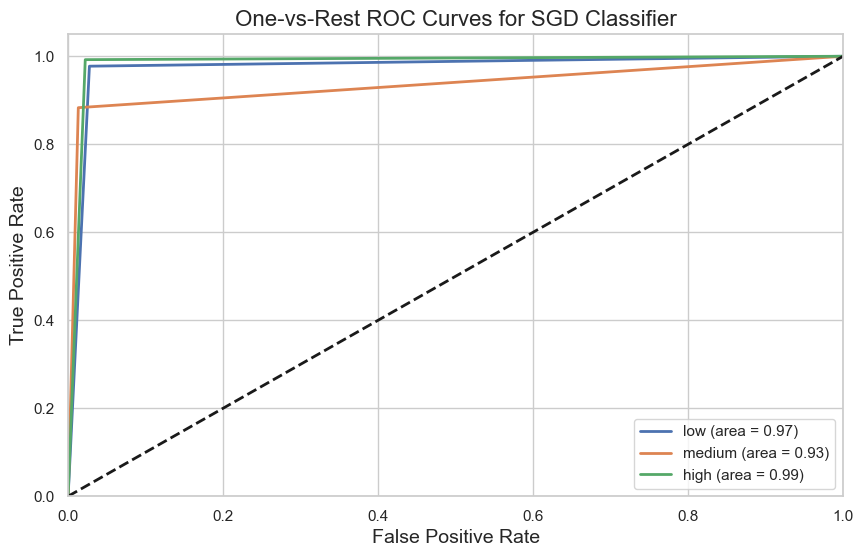

AUC low = 0.9750
AUC medium = 0.9350
AUC high = 0.9851


In [37]:
auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_cv, class_labels, 'SGD Classifier')

### RandomForest Classifier

In [38]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=69), param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best Cross-Validation Score for RandomForestClassifier:", grid_search_rf.best_score_)

Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for RandomForestClassifier: 0.955952380952381


In [39]:
y_pred_at = grid_search_rf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 1.0000
Precision (macro) = 1.0000
Recall (macro)    = 1.0000
F1 score (macro)  = 1.0000
Confusion Matrix:
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


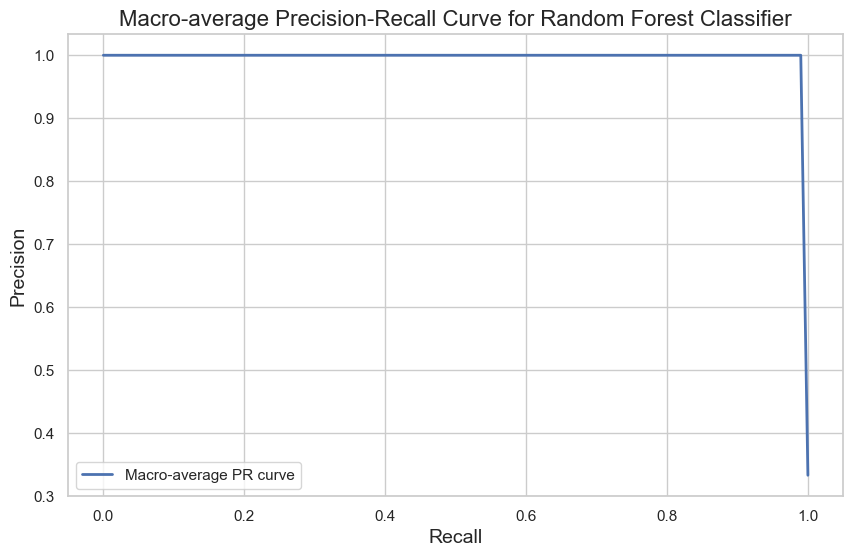

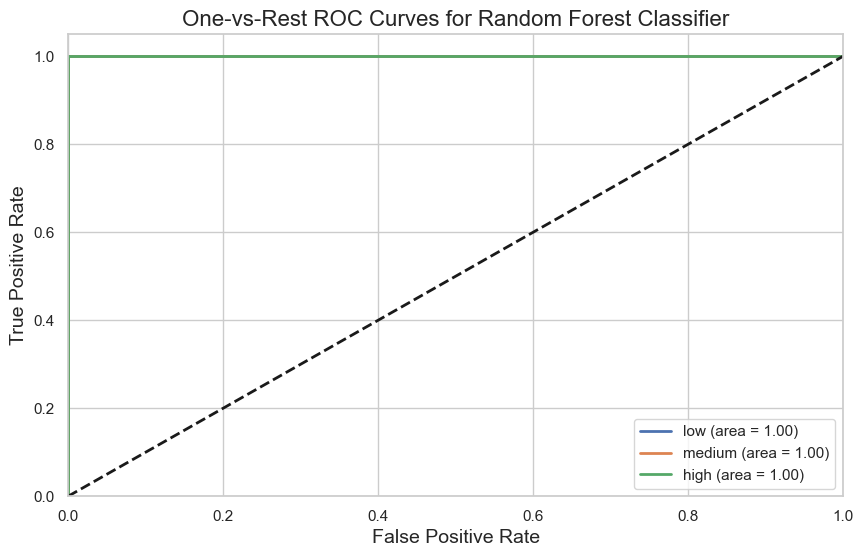

AUC low = 1.0000
AUC medium = 1.0000
AUC high = 1.0000


In [40]:
auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_at, class_labels, 'Random Forest Classifier')

### Logistic Classifier

In [41]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV for LogisticRegression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=69), param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for LogisticRegression:", grid_search_lr.best_params_)
print("Best Cross-Validation Score for LogisticRegression:", grid_search_lr.best_score_)

Best Parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score for LogisticRegression: 0.9827380952380953


In [42]:
y_pred_at = grid_search_lr.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9958
Precision (macro) = 0.9950
Recall (macro)    = 0.9954
F1 score (macro)  = 0.9952
Confusion Matrix:
[[773   0   2]
 [  0 439   4]
 [  0   1 461]]


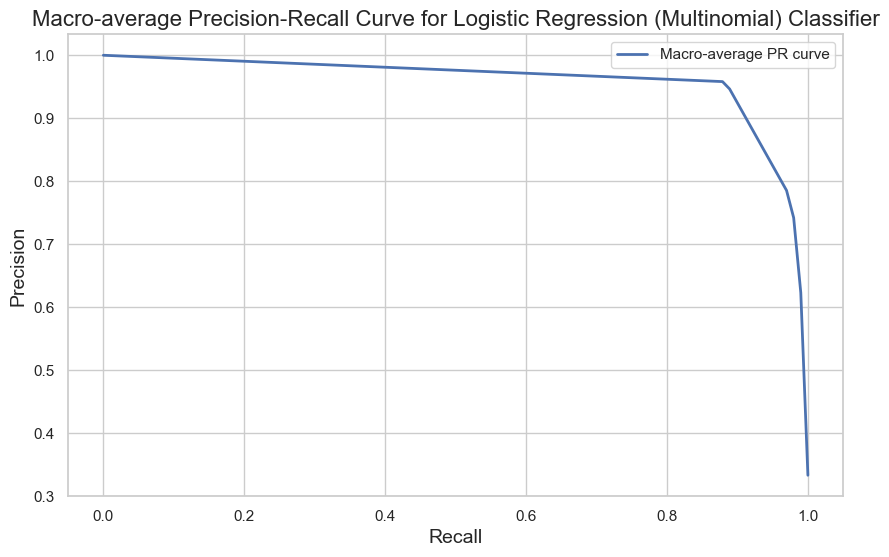

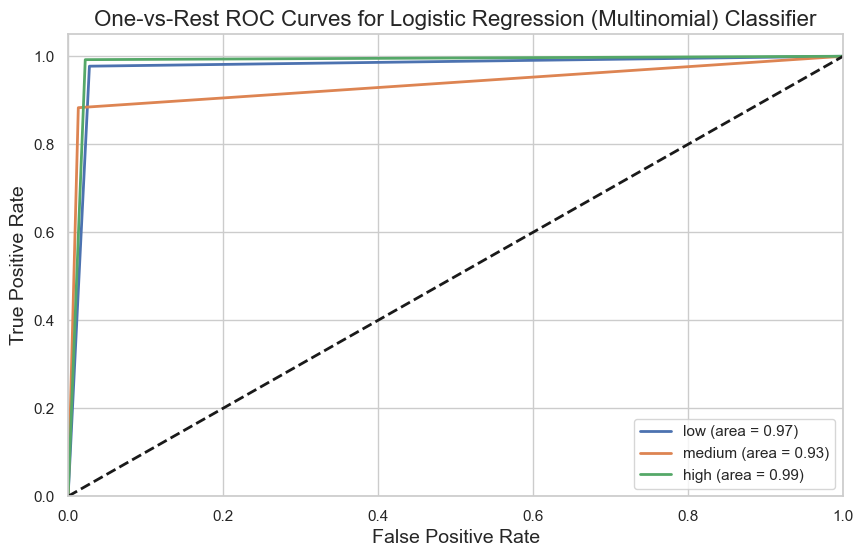

AUC low = 0.9750
AUC medium = 0.9350
AUC high = 0.9851


In [43]:
auc_scores = plot_multiclass_pr_roc_curves(y_train,y_pred_cv, class_labels, 'Logistic Regression (Multinomial) Classifier')

# Chosen model (Random Forest Classifier)

## Evalute on test set

In [44]:
y_pred_chosen = grid_search_rf.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))

Accuracy on training set: 0.9595
Precision (macro) = 0.9518
Recall (macro)    = 0.9527
F1 score (macro)  = 0.9516


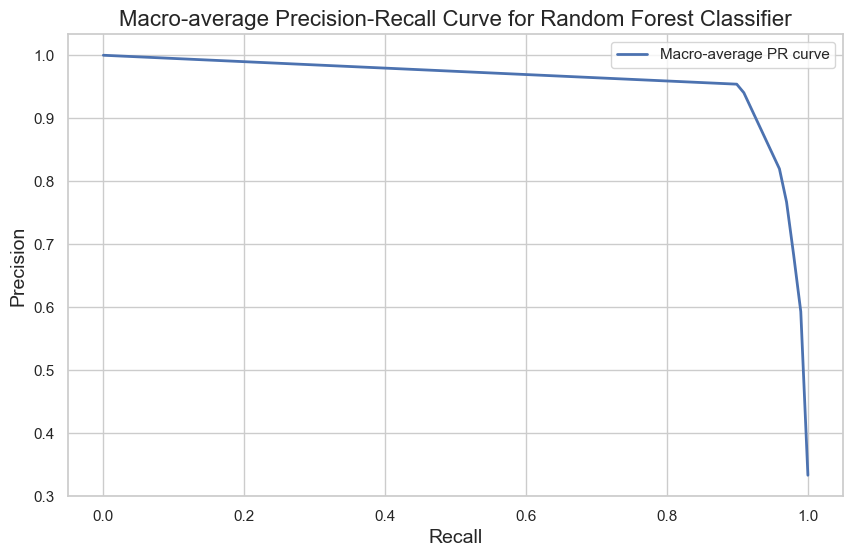

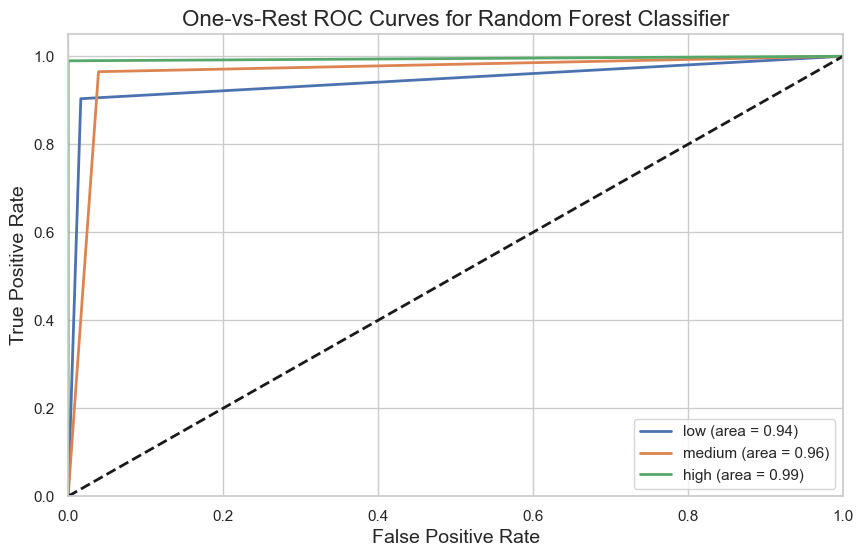

AUC low = 0.9436
AUC medium = 0.9628
AUC high = 0.9948


In [45]:
auc_scores = plot_multiclass_pr_roc_curves(y_test,y_pred_chosen, class_labels, 'Random Forest Classifier')

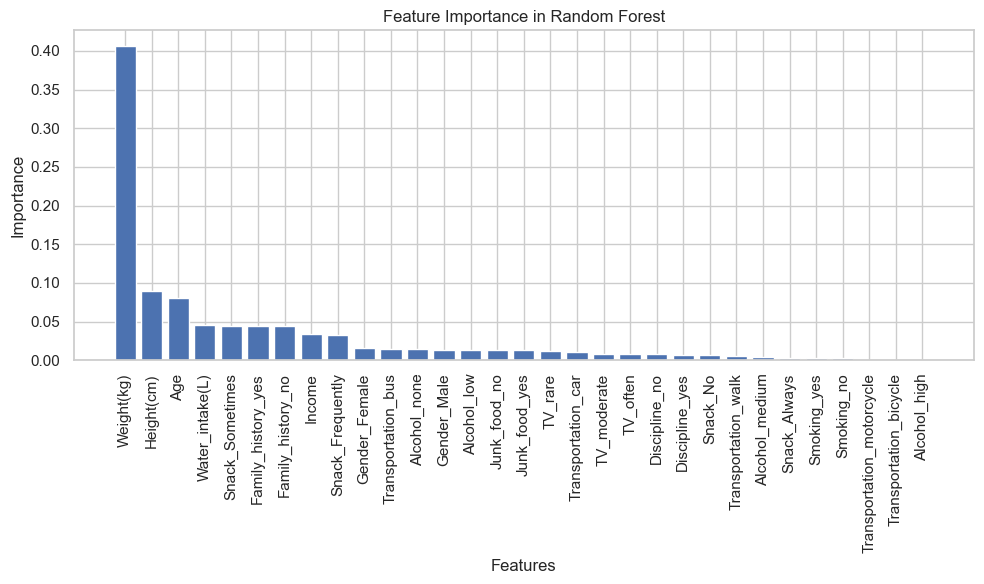

In [46]:
best_rf = grid_search_rf.best_estimator_
y_pred_best = best_rf.predict(X_test_tr)
feature_importance = best_rf.feature_importances_
feature_names = numerical_cols + feature_names_afEncode.tolist()

# Sort features by importance
feature_importance_sorted = sorted(zip(feature_importance, feature_names), reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for imp, _ in feature_importance_sorted])
plt.xticks(range(len(feature_importance)), [name for _, name in feature_importance_sorted], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [52]:
best_rf = grid_search_sgd.best_estimator_
y_pred_best = best_rf.predict(X_test_tr)
coefficients = best_rf.coef_

feature_names = numerical_cols + feature_names_afEncode.tolist()

importance = np.abs(coefficients).flatten()  # Flatten for single class; adjust if multi-class

# Combine feature names and their importance
feature_importance = sorted(zip(importance, feature_names), reverse=True)

# Print the features and their importance
for importance, name in feature_importance:
    print(f"Feature: {name}, Importance: {importance:.4f}")

Feature: Weight(kg), Importance: 212.5009
Feature: Height(cm), Importance: 71.8161
Feature: Alcohol_medium, Importance: 10.8054
Feature: Alcohol_none, Importance: 8.2267
Feature: Family_history_no, Importance: 8.0568
Feature: Gender_Male, Importance: 8.0004
Feature: Junk_food_no, Importance: 7.2477
Feature: Discipline_yes, Importance: 6.3615
Feature: Family_history_yes, Importance: 3.7957
Feature: Gender_Female, Importance: 3.7393
Feature: Alcohol_low, Importance: 3.5115
Feature: Junk_food_yes, Importance: 2.9866
Feature: Water_intake(L), Importance: 2.6711
Feature: Discipline_no, Importance: 2.1004
Feature: Income, Importance: 2.0876
Feature: TV_moderate, Importance: 1.8924
Feature: Transportation_car, Importance: 1.0145
Feature: Transportation_bus, Importance: 0.9986
Feature: Transportation_walk, Importance: 0.9168
Feature: Snack_Frequently, Importance: 0.3376
Feature: Transportation_motorcycle, Importance: 0.0000
Feature: Transportation_bicycle, Importance: 0.0000
Feature: TV_rare, 

In [53]:

# Assuming best_rf is actually the best model from grid search for SGDClassifier
best_rf = grid_search_sgd.best_estimator_
y_pred_best = best_rf.predict(X_test_tr)
coefficients = best_rf.coef_  # Coefficients for all classes

# Feature names
feature_names = numerical_cols + feature_names_afEncode.tolist()

# Calculate feature importance for each class
# Initialize an array to hold the sum of absolute values of coefficients for each feature
importance_sum = np.sum(np.abs(coefficients), axis=0)

# Combine feature names and their importance
feature_importance = sorted(zip(importance_sum, feature_names), reverse=True)

# Print the features and their importance
for importance, name in feature_importance:
    print(f"Feature: {name}, Importance: {importance:.4f}")

# Optional: Normalize importance values if needed
importance_sum_normalized = importance_sum / np.max(importance_sum)
feature_importance_normalized = sorted(zip(importance_sum_normalized, feature_names), reverse=True)

# Print the normalized features and their importance
print("\nNormalized Feature Importances:")
for importance, name in feature_importance_normalized:
    print(f"Feature: {name}, Normalized Importance: {importance:.4f}")

Feature: Weight(kg), Importance: 358.6446
Feature: Height(cm), Importance: 113.1140
Feature: Discipline_yes, Importance: 20.8945
Feature: Family_history_no, Importance: 18.1892
Feature: Gender_Female, Importance: 16.9568
Feature: Smoking_no, Importance: 16.7659
Feature: Alcohol_medium, Importance: 15.0053
Feature: Junk_food_no, Importance: 14.6411
Feature: Snack_No, Importance: 13.0618
Feature: Alcohol_none, Importance: 12.8770
Feature: Junk_food_yes, Importance: 11.9975
Feature: Family_history_yes, Importance: 10.7933
Feature: Gender_Male, Importance: 10.2826
Feature: Snack_Sometimes, Importance: 8.5041
Feature: Alcohol_low, Importance: 8.3578
Feature: TV_often, Importance: 8.2944
Feature: Transportation_car, Importance: 7.9375
Feature: Transportation_bus, Importance: 7.6004
Feature: Transportation_motorcycle, Importance: 6.0347
Feature: Transportation_bicycle, Importance: 5.2420
Feature: Snack_Always, Importance: 5.2128
Feature: Discipline_no, Importance: 4.1470
Feature: Income, Impo